In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../dados/student-alcohol-consumption.csv")
daily_show = pd.read_csv("../dados/daily_show_guests_cleaned.csv")

# Capítulo 1

## Para criar um histograma, basta usarmos a função sns.histplot com a variável do data frame

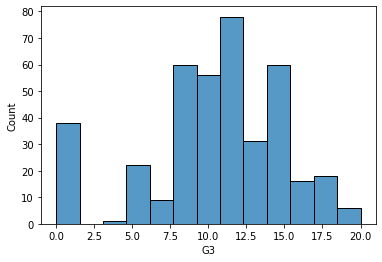

In [3]:
sns.histplot(data['G3'])
plt.show()

## Para especificarmos o número de barras, basta usarmos o argumentos bins

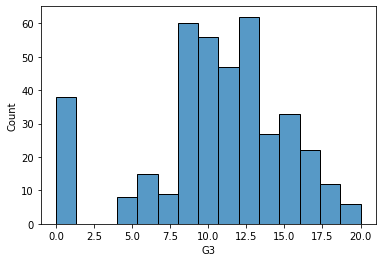

In [4]:
sns.histplot(data['G3'], bins=15)
plt.show()

## Para criarmos uma estimativa da função densidade de probabilidade, podemos usar a função sns.displot com o argumento kind="kde"

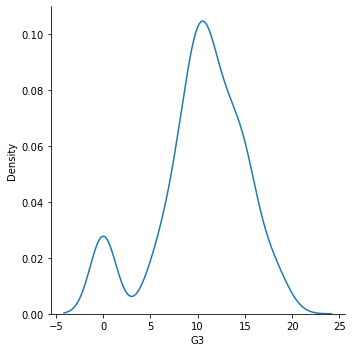

In [5]:
sns.displot(data['G3'], kind='kde')
plt.show()

## Para usarmos juntos com o histograma, adicionamos o argumentos kde=True

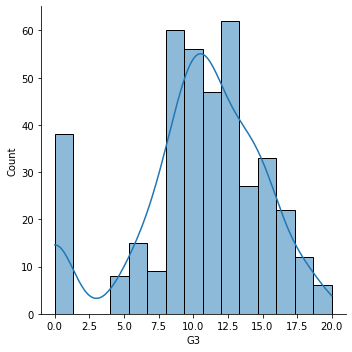

In [6]:
sns.displot(data['G3'], kde=True, bins=15)
plt.show()

## Também podemos preencher a área da curva com alguma cor usando o argumento fill=True e podemos colocar pequenas linhas indicando as observações usando o argumento rug=True

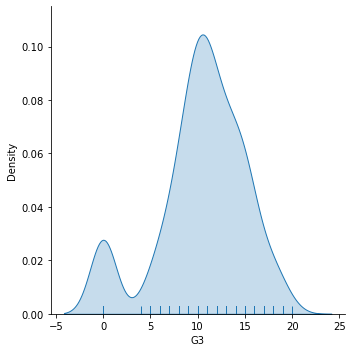

In [7]:
sns.displot(data['G3'], kind='kde', rug=True, fill=True)
plt.show()

## Gráfico que mostra a linha estimada por um modelo de regressão linear simples e os respectivos pontos de x e y

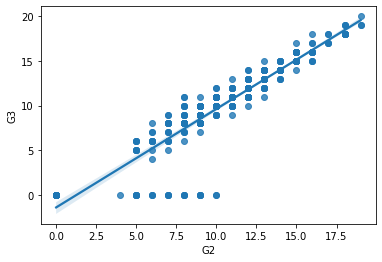

In [8]:
sns.regplot(data=data, x="G2", y="G3")
plt.show()

## Outra forma de criar um gráfico que mostra a linha estimada por um modelo de regressão linear simples e os respectivos pontos de x e y

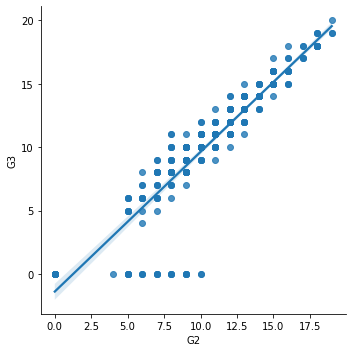

In [9]:
sns.lmplot(data=data, x="G2", y="G3")
plt.show()

## Mudando a cor dos pontos baseado em uma variável categórica

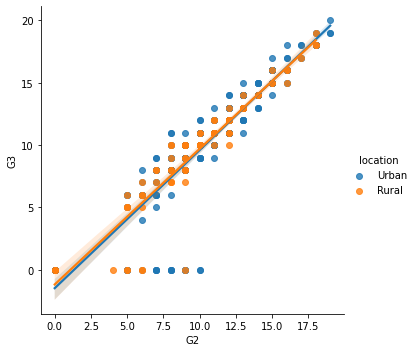

In [10]:
sns.lmplot(data=data, x="G2", y="G3", hue="location")
plt.show()

## Criando múltiplos gráficos em colunas diferentes colunas usando uma variável categórica, usando o argumento col

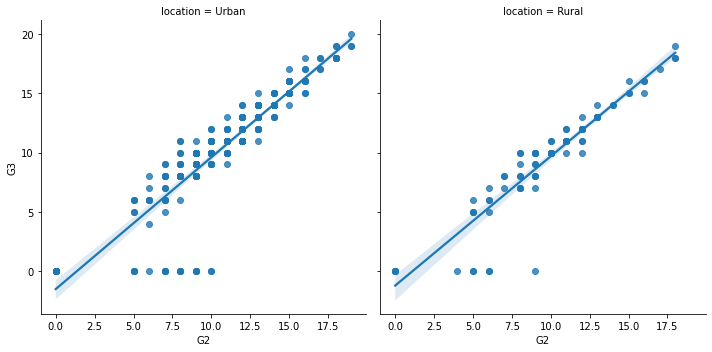

In [11]:
sns.lmplot(data=data, x="G2", y="G3", col="location")
plt.show()

## Criando múltiplos gráficos em linhas diferentes colunas usando uma variável categórica, usando o argumento crow

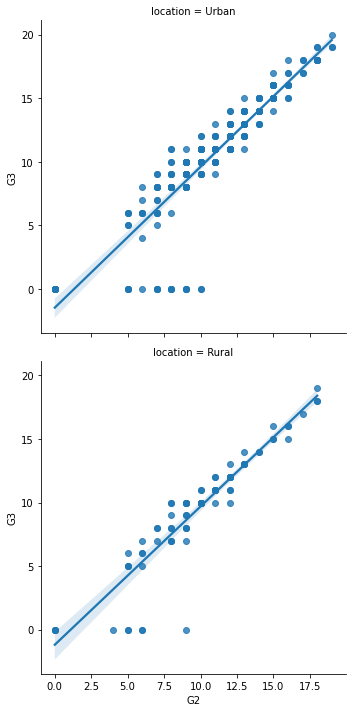

In [12]:
sns.lmplot(data=data, x="G2", y="G3", row="location")
plt.show()

## Capítulo 2

## Mudando a cor de um histograma

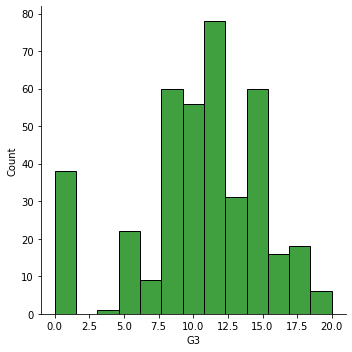

In [13]:
sns.displot(data['G3'], color='g')
plt.show()

## Nesse gráfico vou usar um artifício do matplotlib para adicionar duas linhas verticais de formatos diferentes, uma é a média e a outra é a mediana. Também mudo a legenda do eixo x e limito o intervalo de acordo com o valor mínimo de 2 e valor máximo de 15, também posso mudar o título com o argumento title

In [14]:
g3_median=np.median(data["G3"])
g3_mean=np.mean(data["G3"])

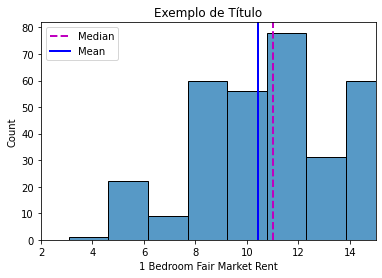

In [15]:
fig, ax = plt.subplots()
sns.histplot(data['G3'], ax=ax)
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(2,15), title="Exemplo de Título")
ax.axvline(x=g3_median, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=g3_mean, color='b', label='Mean', linestyle='-', linewidth=2)
ax.legend()
plt.show()

## Se quisermos usar sub gráficos em um mesmo plot e usar diferentes métodos em cada um deles, temos que usar algumas funções do matplotlib

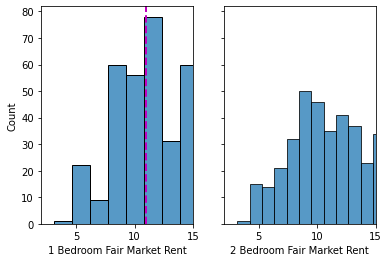

In [16]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
sns.histplot(data['G3'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(2,15))
ax0.axvline(x=g3_median, color='m', label='Median', linestyle='--', linewidth=2)
sns.histplot(data['G2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(2,15))
plt.show()

## Gráficos do capítulo 3

## Gráfico que mostra uma nuvem de pontos sobreposta com base em uma variável categórica

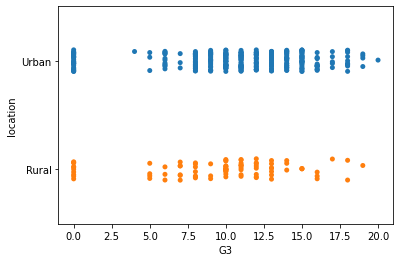

In [17]:
sns.stripplot(data=data, y="location", x="G3", jitter=True)
plt.show()

## Gráfico que mostra uma nuvem de pontos separados com base em uma variável categórica

C:\Users\alber\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


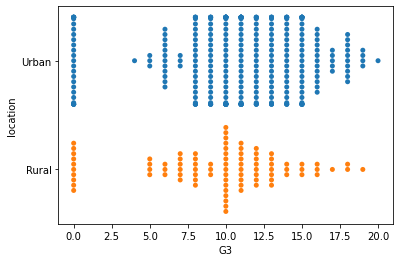

In [18]:
sns.swarmplot(data=data, y="location", x="G3")
plt.show()

## Mostra a distribuição em formato de violino com base em uma variável categórica

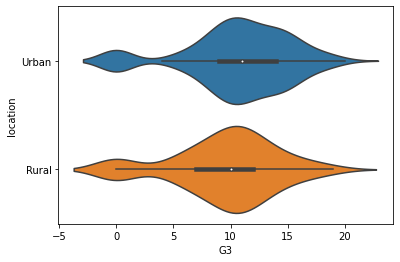

In [19]:
sns.violinplot(data=data, y="location", x="G3")
plt.show()

## Mostra a distribuição em formato de caixas com base em uma variável categórica

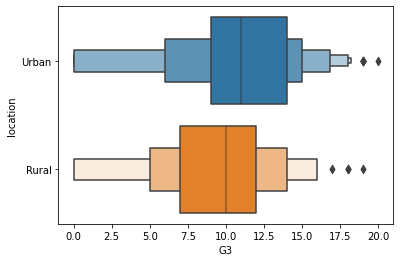

In [20]:
sns.boxenplot(data=data, y="location", x="G3")
plt.show()

In [21]:
pd_crosstab = pd.crosstab(daily_show["Group"], daily_show["YEAR"])

## Gráfico de heatmap usando uma rotação dos valores do eixo x 

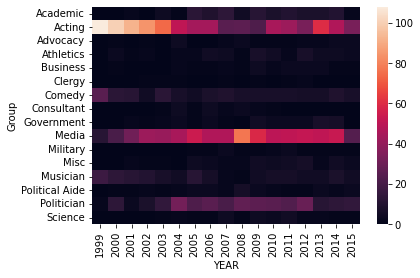

In [22]:
sns.heatmap(pd_crosstab)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Gráfico de heatmap usando uma rotação dos valores do eixo x. Também acrescentamos alguns argumentos adicionais:
1. cbar(Para mostrar a barra de valores na direita)
2. cmap(Palette de cores)
3. linewidths(Espaçamentos entre os quadrados)

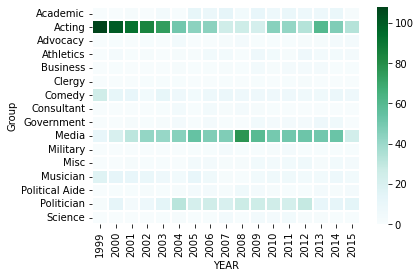

In [23]:
sns.heatmap(pd_crosstab, cbar=True, cmap="BuGn", linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

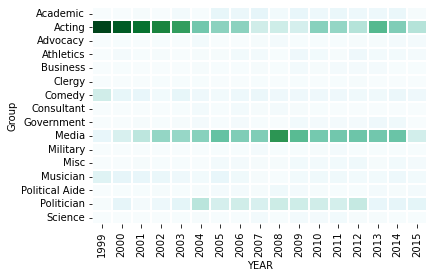

In [24]:
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Para mostrar os números em cada quadrado, devemos usar o argumento annot= True e fmt="d"

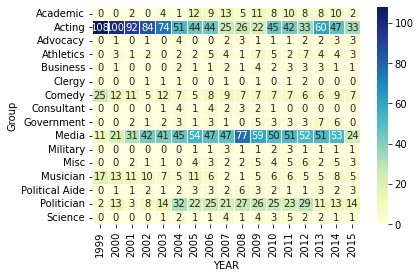

In [27]:
sns.heatmap(pd_crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Aplicação da matriz de correlação entre variáveis usando o heatmap

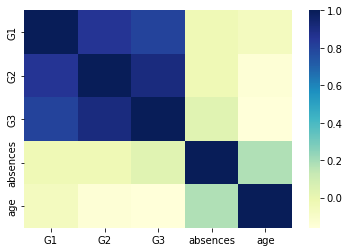

In [26]:
cols = ['G1', 'G2', 'G3', 'absences', 'age']
sns.heatmap(data[cols].corr(), cmap='YlGnBu')
plt.show()

## Gráficos do Capítulo 4

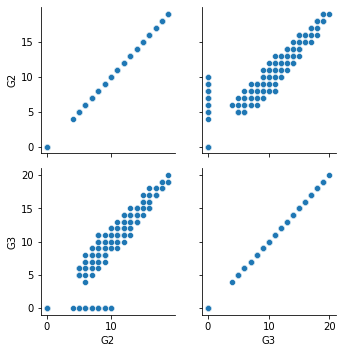

<Figure size 432x288 with 0 Axes>

In [29]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(data, vars=["G2", "G3"])
g = g.map(sns.scatterplot)

plt.show()

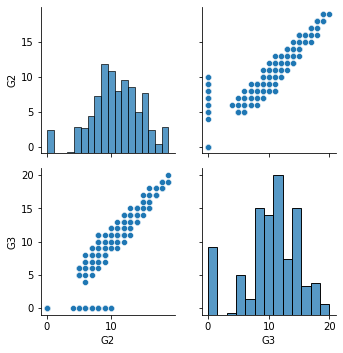

<Figure size 432x288 with 0 Axes>

In [30]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(data, vars=["G2", "G3"])
g = g.map_diag(sns.histplot)
g = g.map_offdiag(sns.scatterplot)
plt.show()

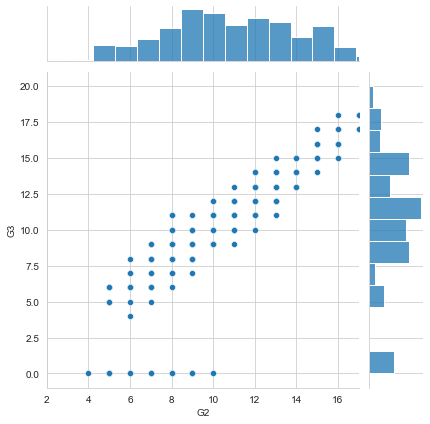

<Figure size 432x288 with 0 Axes>

In [34]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="G2",
            y="G3",
            data=data,
                xlim=(2, 17)) 

g.plot(sns.scatterplot, sns.histplot)

plt.show()

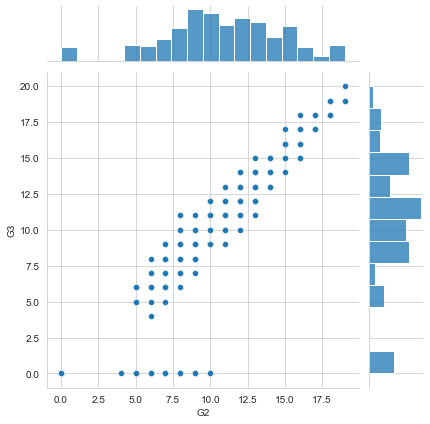

<Figure size 432x288 with 0 Axes>

In [36]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="G2",
        y="G3",
        kind='scatter',
        data=data)

plt.show()

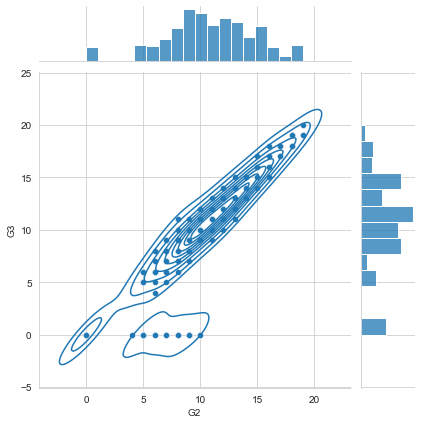

In [37]:
# Create a jointplot similar to the JointGrid 
g=sns.jointplot(x="G2",
        y="G3",
        kind='scatter',
        data=data)
g.plot_joint(sns.kdeplot)
plt.show()